### imports

In [0]:
import numpy as np
from IPython.display import IFrame
import matplotlib.pyplot as plt

# Machine Learning

In [0]:
IFrame('https://dreampuf.github.io/GraphvizOnline/#graph%20G%20%7B%0A%20%20%20%20graph%20%5Brankdir%3DLR%5D%3B%0A%20%20%20%20node%20%5Bshape%3Dbox%2Cheight%3D0.1%2Cstyle%3Dsolid%5D%3B%0A%20%20%20%20%22Machine%20Learning%22%20--%20%22Supervised%20Learning%22%3B%0A%20%20%20%20%22Machine%20Learning%22%20--%20%22Unupervised%20Learning%22%3B%0A%20%20%20%20%22Supervised%20Learning%22%20--%20%22Classification%22%3B%0A%20%20%20%20%22Supervised%20Learning%22%20--%20%22Regression%22%3B%0A%20%20%20%20%22Unupervised%20Learning%22%20--%20%22Clustering%22%3B%0A%20%20%20%20%22Unupervised%20Learning%22%20--%20%22Dimensionality%20Reduction%22%3B%0A%7D', width=800, height=650)

![alt text](https://scikit-learn.org/stable/_static/ml_map.png)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Iris

In [0]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()

In [0]:
iris.data.shape

(150, 4)

|    | d1 | d2 | d3 | d4 |
|----|----|----|----|----|
| s1 |v11|v12|v13|v14|
| s2 |v21|v22|v23|v24|
| s3 |v31|v32|v33|v34|
| ... | | | | |
| sn |vn1|vn2|vn3|vn4|

- one **sample** per row
 - number of samples
 - data
 - X
- one column per **dimension**
 - also called **feature**
 - features can be anything
- additionally: list of n **labels**
 - classes
 - target
 - Y

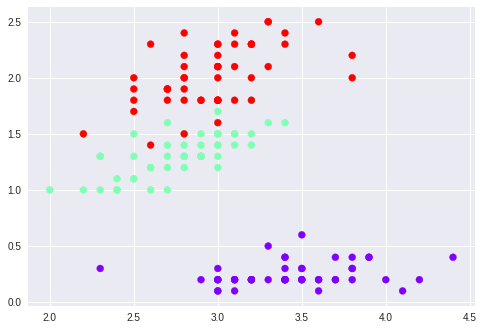

In [5]:
plt.scatter(iris.data[:,1],iris.data[:,3], c=iris.target,cmap='rainbow')

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_001.png)

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_0011.png)

In [0]:
clf = SVC(gamma='scale')
clf.fit(iris.data[:-10], iris.target[:-10])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
pred = list(clf.predict(iris.data[-10:]))
exp  = iris.target[-10:]
for i in range(10):
  print('predicted: '+str(pred[i])+' / expected: '+str(exp[i]))

predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2
predicted: 2 / expected: 2


a note on fitting, curve fitting, learn parameter

![alt text](https://www.r-graph-gallery.com/wp-content/uploads/2015/10/44_adjust_a_polynom.png?w=640)

In [0]:
clf.dual_coef_

array([[ 0.        ,  0.32687884,  1.        ,  1.        ,  0.07574574,
         1.        ,  1.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -1.        , -0.        ,
        -0.        , -0.40262458, -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -1.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -1.        , -1.        , -0.        , -0.        ,
        -1.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.33993804,
        -0.        , -0.        , -0.        , -0.68845186, -0.        ],
       [ 0.25922268,  0.        ,  0.03764086,  0.26932884,  0.        ,
         0.46219752,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  0.

## fashion MNIST

https://www.tensorflow.org/tutorials/keras/basic_classification

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

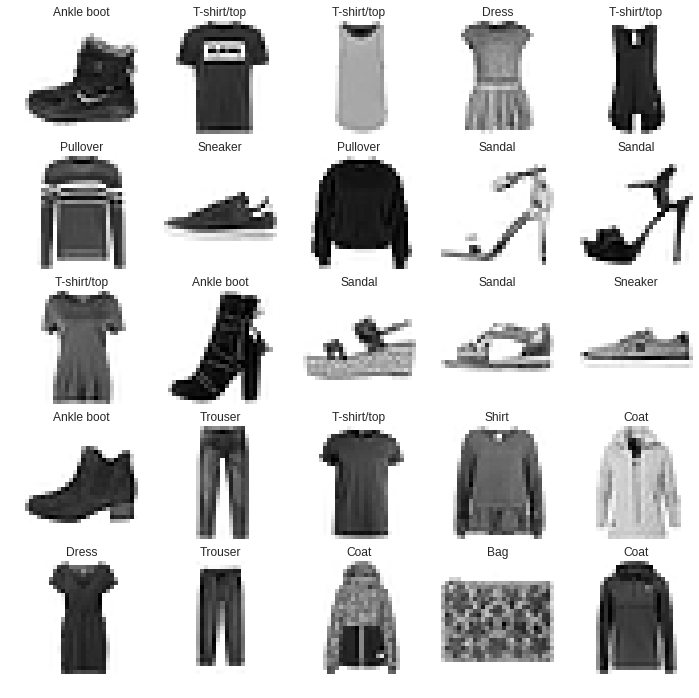

In [0]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  img = -1*train_images[i]
  plt.imshow(img,cmap='gray')
  plt.grid(None)
  plt.axis('off')
  plt.gca().set_title(label_dict[train_labels[i]])

get some information on dimensions and values of samples

In [0]:
train_images[0].shape,train_images[0].min(),train_images[0].max()

((28, 28), 0, 255)

scale data to range 0-1

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

create model as a sequence of layers

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.4972 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3750 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3357 - acc: 0.8791
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.3125 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2952 - acc: 0.8917


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions.shape

(10000, 10)

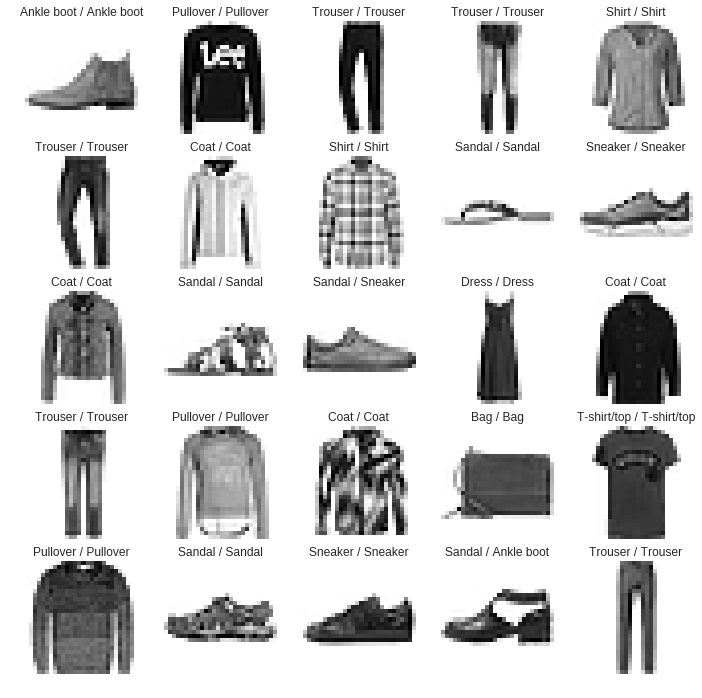

In [0]:
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  img = -1*test_images[i]
  plt.imshow(img,cmap='gray')
  plt.grid(None)
  plt.axis('off')
  li = np.argmax(predictions[i])
  plt.gca().set_title(label_dict[li]+' / '+label_dict[test_labels[i]])

### your own image

In [0]:
from skimage import io, transform

In [0]:
path = 'https://cdn.shopify.com/s/files/1/2256/1635/products/DaliLlama_mockup_1024x1024.jpg?v=1540496256'
path = 'https://cdn.dickiesworkwear.com/img/Workwear/product/ed247-grey-orange.jpg'
my_img = io.imread(path,flatten=True)

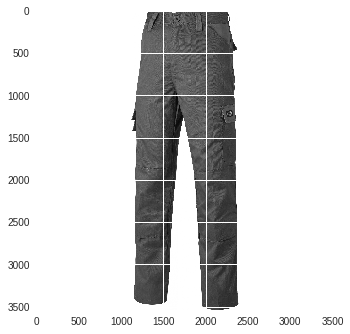

In [0]:
plt.imshow(-my_img)

In [0]:
small_img = transform.resize(my_img,(28,28))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


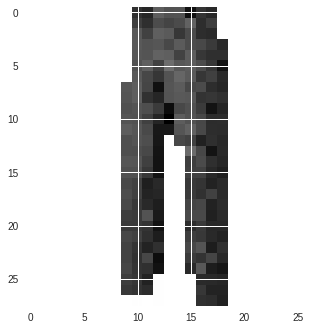

In [0]:
plt.imshow(-small_img)

In [0]:
test = np.zeros((1,28,28))
test[0,:,:] = 1-small_img

In [0]:
my_pred = model.predict(test)

In [0]:
print(label_dict[np.argmax(my_pred[0])])

Trouser


In [0]:
my_pred

array([[1.3459189e-08, 1.0000000e+00, 8.5880338e-11, 4.2985775e-08,
        6.1060010e-09, 2.7336241e-12, 2.5675653e-09, 9.8591391e-15,
        2.3168890e-11, 1.2777766e-14]], dtype=float32)

### GoogleNet

![alt text](https://cdn-images-1.medium.com/max/2600/1*ZFPOSAted10TPd3hBQU8iQ.png)

## Terminology
- precision
- recall
- accuracy
- false positives
- false negatives
- confusion matrix

![alt text](https://cdn-images-1.medium.com/max/2000/1*pOtBHai4jFd-ujaNXPilRg.png)

confusion matrix

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png)